In [123]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


# Convolutional neural network (CNN)

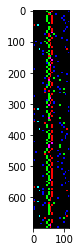

In [124]:
directory = '/Users/adriankaufmann/Desktop/RGBimages_trainingset/'
categories = ['negative_all', 'positive_all']

#path to positive/negative directory
for category in categories:
    path = os.path.join(directory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))#, cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show
        break
    break

In [125]:
training_data = []


for category in categories:
    path = os.path.join(directory, category)
    class_num = categories.index(category) #negative should be zero now
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))#, cv2.IMREAD_GRAYSCALE)
        #new_array = cv2.resize(img_array, (WIDTH, LENTH))
        training_data.append([img_array, class_num])
    


In [126]:
# getting rid of the 'corrupted' images (need to find out why they occured)
training = []
for c,i in enumerate(training_data):
    if i[0] is not None:
        training.append(i)

In [129]:
#pack it into parameters to feed neural network

X = [] #feature set
y = [] #labels

for features, label in training:
    X.append(features)
    y.append(label)



In [130]:
#shuffle the data, to mix up the two categories


from sklearn.utils import shuffle
import numpy as np

X, y = shuffle(X, y)

In [131]:
## SEQUENCE PADDING
for c,i in enumerate(X):
    X[c] = tf.image.resize_with_pad(i, 698, 133, method=tf.image.ResizeMethod.BILINEAR, antialias=False)
    

In [132]:
#convert X list into array

X = np.array(X).astype(np.float32) #.reshape(-1,698,3)#.astype('float32') #(all features, colors)
y = np.array(y).astype(np.float32) 

In [133]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 3)


In [134]:
# normalizing the data (between 0 and 1)
X = X.astype("float") / 255.0

In [135]:
#splitting the data into test and validation subset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [136]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape= (698,133,3))) #X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  #convert 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [137]:
X.shape[:]


(660, 698, 133, 3)

In [ ]:
model.fit(X, y, batch_size=4, epochs=3)

# CNN training results

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix_all = confusion_matrix(y_test, predictions)
print(cf_matrix_all)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# plot the matrix
cax = ax.matshow(cf_matrix_all)

# add colorbar for reference
fig.colorbar(cax)

cm = confusion_matrix(y_test, predictions, y)

# add labels to plot
plt.xlabel("Predicted")
plt.ylabel("True")

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
plt.xlabel('Predicted label\naccuracy={:0.3f}; misclass={:0.1f}'.format(accuracy, misclass))

plt.show()

# Simulated annealing (SA)

In [ ]:

# random sequence (length 100aa) with average amino acid composition (computed from Swiss-Prot)
# from: https://web.expasy.org/randseq/
antigenseq = "RVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNF"


#ran_seq = 'MAQVQLVESGGALVQPGGSLRLSCAASGFPVNRYSMRWYRQAPGKEREWVAGMSSAGDRSSYEDSVKGRFTISRDDARNTVYLQMNSLKPEDTAVYYCNVNVGFEYWGQGTQVTVSSHHHHHH' 
ran_seq = 'EFQQVGPIICTRSTTFLTAPRFNWPYNDKPNTERNIEKIGLDGASEIVLAIGEVVRAEVSLNLEADAEVGAKMYTRPGVYLHHGSTAKLLAFKVAQSDKDLAFSGRLPKLQVRIDMILGHLQESYCSMDS' 
dictionary = {"D": 0,"E": 1,"C": 2,"N": 3,"F": 4,"Q": 5,"Y": 6,"S": 7, "M": 8,"T": 9,"I": 10,"G": 11,"V": 12,"W": 13,"L": 14,"A": 15,"P": 16,"H": 17,"K": 18,"R": 19}

seq_onehot = AAseq(ran_seq, dictionary)
charge_onehot = AAcharge(ran_seq, antigenseq, dictionary, charge_df)
hydroph_onehot = AAhydroph(ran_seq, antigenseq, dictionary, hydroph_df)

X_original = cv2.imread(img)

a = np.array(seq_onehot)
b = np.array(charge_onehot)
c = np.array(hydroph_onehot)

X_array = np.dstack([a,b,c])
X_original = tf.image.resize_with_pad(X_array, 698, 163, method=tf.image.ResizeMethod.BILINEAR, antialias=False)
X_original = np.array(X_original).astype(np.float32)
X_original = X_original.reshape(X_original.shape[0], X_original.shape[1], X_original.shape[2])
X_original = X_original.astype("float") / 255.0

pred_init = model.predict( np.array( [X_original,]))[0][0]



print(pred_init)
pred = 0
count = 0
c = 0

pred_best = 0
seq_best = ''

while pred < 0.95:

    temp_seq = ran_seq
    
    letter = random.choice(list(dictionary))
    number = random.randint(0,len(ran_seq)-1)
    mut_seq = list(ran_seq)
    mut_seq[number] = letter
    mut_seq = ''.join(mut_seq)
    
    
    seq_onehot = AAseq(mut_seq, dictionary)
    charge_onehot = AAcharge(mut_seq, antigenseq, dictionary, charge_df)
    hydroph_onehot = AAhydroph(mut_seq, antigenseq, dictionary, hydroph_df)

    X_opt = cv2.imread(img)

    a = np.array(seq_onehot)
    b = np.array(charge_onehot)
    c = np.array(hydroph_onehot)

    X_array = np.dstack([a,b,c])
    X_opt = tf.image.resize_with_pad(X_array, 698, 163, method=tf.image.ResizeMethod.BILINEAR, antialias=False)
    X_opt = np.array(X_opt).astype(np.float32)
    X_opt = X_opt.reshape(X_opt.shape[0], X_opt.shape[1], X_opt.shape[2])
    X_opt = X_opt.astype("float") / 255.0

    pred = model.predict( np.array( [X_opt,]))[0][0]

    delta_pred = abs(pred - pred_init)
    
    if pred > pred_init:
        
        if pred > pred_best:
            seq_best = mut_seq
            pred_best = pred
            print(pred_best, seq_best)
        
        ran_seq = mut_seq
       
    
    elif random.uniform(0, 1) < math.exp(-delta_pred):
        ran_seq = mut_seq
    else:
        ran_seq = temp_seq
        
    
    pred_init = pred
